### **Kernel y capas de convolucion**
![Descripción opcional](https://keepcoding.io/wp-content/uploads/2022/08/image-304.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [2]:
url = 'https://labicicleta.net/escuela/wp-content/uploads/BICICLETA_VS_AUTOMOVIL-.jpg'
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Convertir de BGR (OpenCV) a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir a escala de grises para filtro de bordes
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


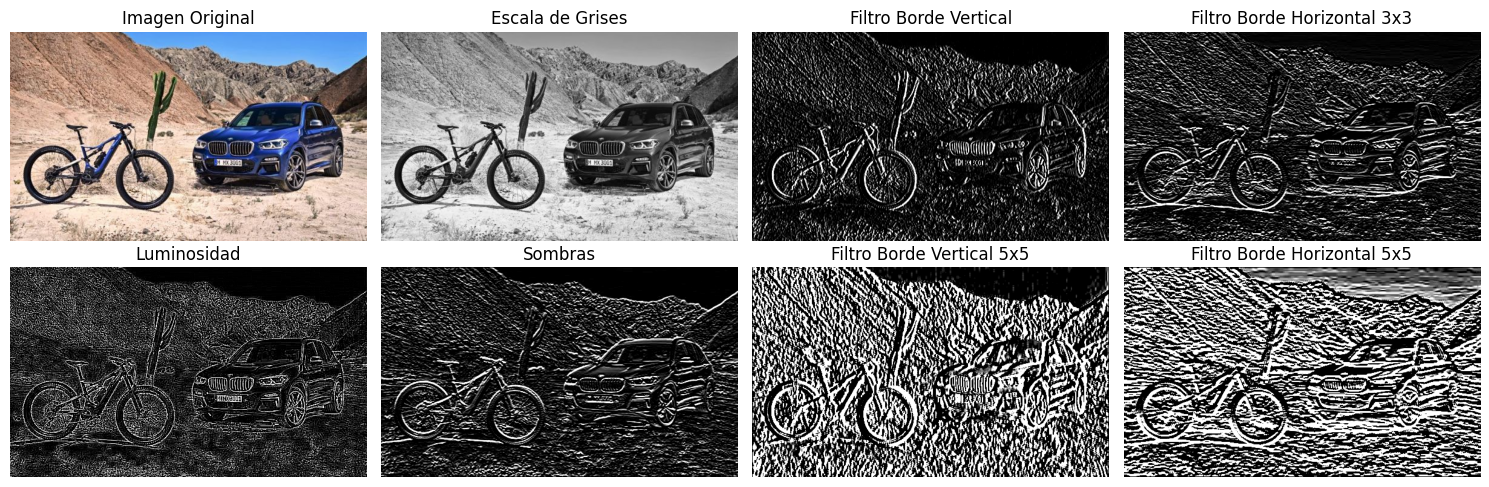

In [3]:
# Filtro para bordes verticales (tipo Sobel)
sobel_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Filtro Sobel horizontal (detecta bordes horizontales)
sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_vertical_5x5 = np.array([
    [-5, -8,  0,  8,  5],
    [-4, -10, 0, 10, 4],
    [-3, -6,  0, 6,  3],
    [-4, -10, 0, 10, 4],
    [-5, -8,  0, 8,  5]
], dtype=np.float32)

sobel_horizontal_5x5 = sobel_vertical_5x5.T  # Transpuesta para invertir dirección

# Aplicar convolución con filtro vertical
filtered_edges_v = cv2.filter2D(gray, -1, sobel_vertical)
filtered_edges_v_5x5 = cv2.filter2D(gray, -1, sobel_vertical_5x5)

filtered_edges_h = cv2.filter2D(gray, -1, sobel_horizontal)
filtered_edges_h_5x5 = cv2.filter2D(gray, -1, sobel_horizontal_5x5)

# Detector de iluminación
bright_detector = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
filtered_bright = cv2.filter2D(gray, -1, bright_detector)

shadow_filter = np.array([
    [1,  2,  1],
    [0,  0,  0],
    [-1, -2, -1]
])
filtered_shadow = cv2.filter2D(gray, -1, shadow_filter)


# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(2, 4, 1)
plt.title("Imagen Original")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Escala de Grises")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Filtro Borde Vertical")
plt.imshow(filtered_edges_v, cmap='gray')
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Filtro Borde Horizontal 3x3")
plt.imshow(filtered_edges_h, cmap='gray')
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title("Luminosidad")
plt.imshow(filtered_bright, cmap='gray')
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title("Sombras")
plt.imshow(filtered_shadow, cmap='gray')
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Filtro Borde Vertical 5x5")
plt.imshow(filtered_edges_v_5x5, cmap='gray')
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title("Filtro Borde Horizontal 5x5")
plt.imshow(filtered_edges_h_5x5, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


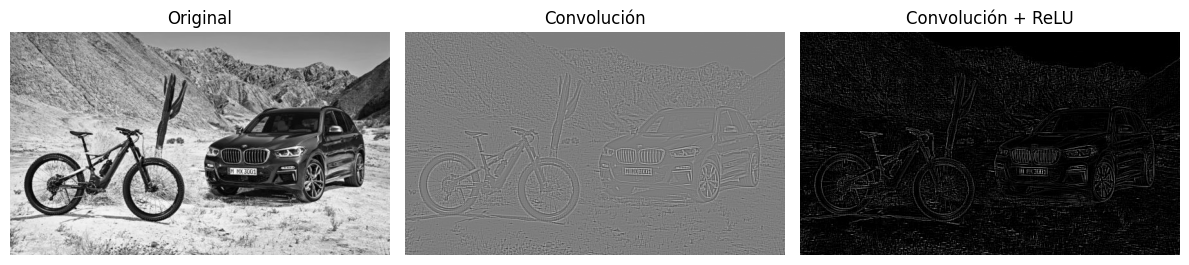

In [11]:
# Filtro
kernel_1 = np.array([
    [-1, 1, -1],
    [ 1,  0,  1],
    [ -1,  1,  -1]
])

# Aplicar convolución
conv_output = cv2.filter2D(gray, cv2.CV_32F, kernel_1)

# Aplicar ReLU
relu_output = np.maximum(0, -conv_output)

# Mostrar resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Convolución")
plt.imshow(conv_output, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Convolución + ReLU")
plt.imshow(relu_output, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

In [14]:
-conv_output

array([[ -30.,   32.,  -25., ...,    4.,    2.,   -8.],
       [  35.,  -63.,   -7., ...,    4.,    3.,   -8.],
       [ -30.,   55.,   -8., ...,    3.,    3.,   -7.],
       ...,
       [  46.,  -47.,    6., ...,  -36.,  -15.,   67.],
       [ 199.,  120.,  100., ...,  -46.,  -29.,   52.],
       [-128., -201., -115., ...,   18.,   26.,  102.]],
      shape=(347, 590), dtype=float32)

In [13]:
relu_output

array([[  0.,  32.,   0., ...,   4.,   2.,   0.],
       [ 35.,   0.,   0., ...,   4.,   3.,   0.],
       [  0.,  55.,   0., ...,   3.,   3.,   0.],
       ...,
       [ 46.,   0.,   6., ...,   0.,   0.,  67.],
       [199., 120., 100., ...,   0.,   0.,  52.],
       [  0.,   0.,   0., ...,  18.,  26., 102.]],
      shape=(347, 590), dtype=float32)

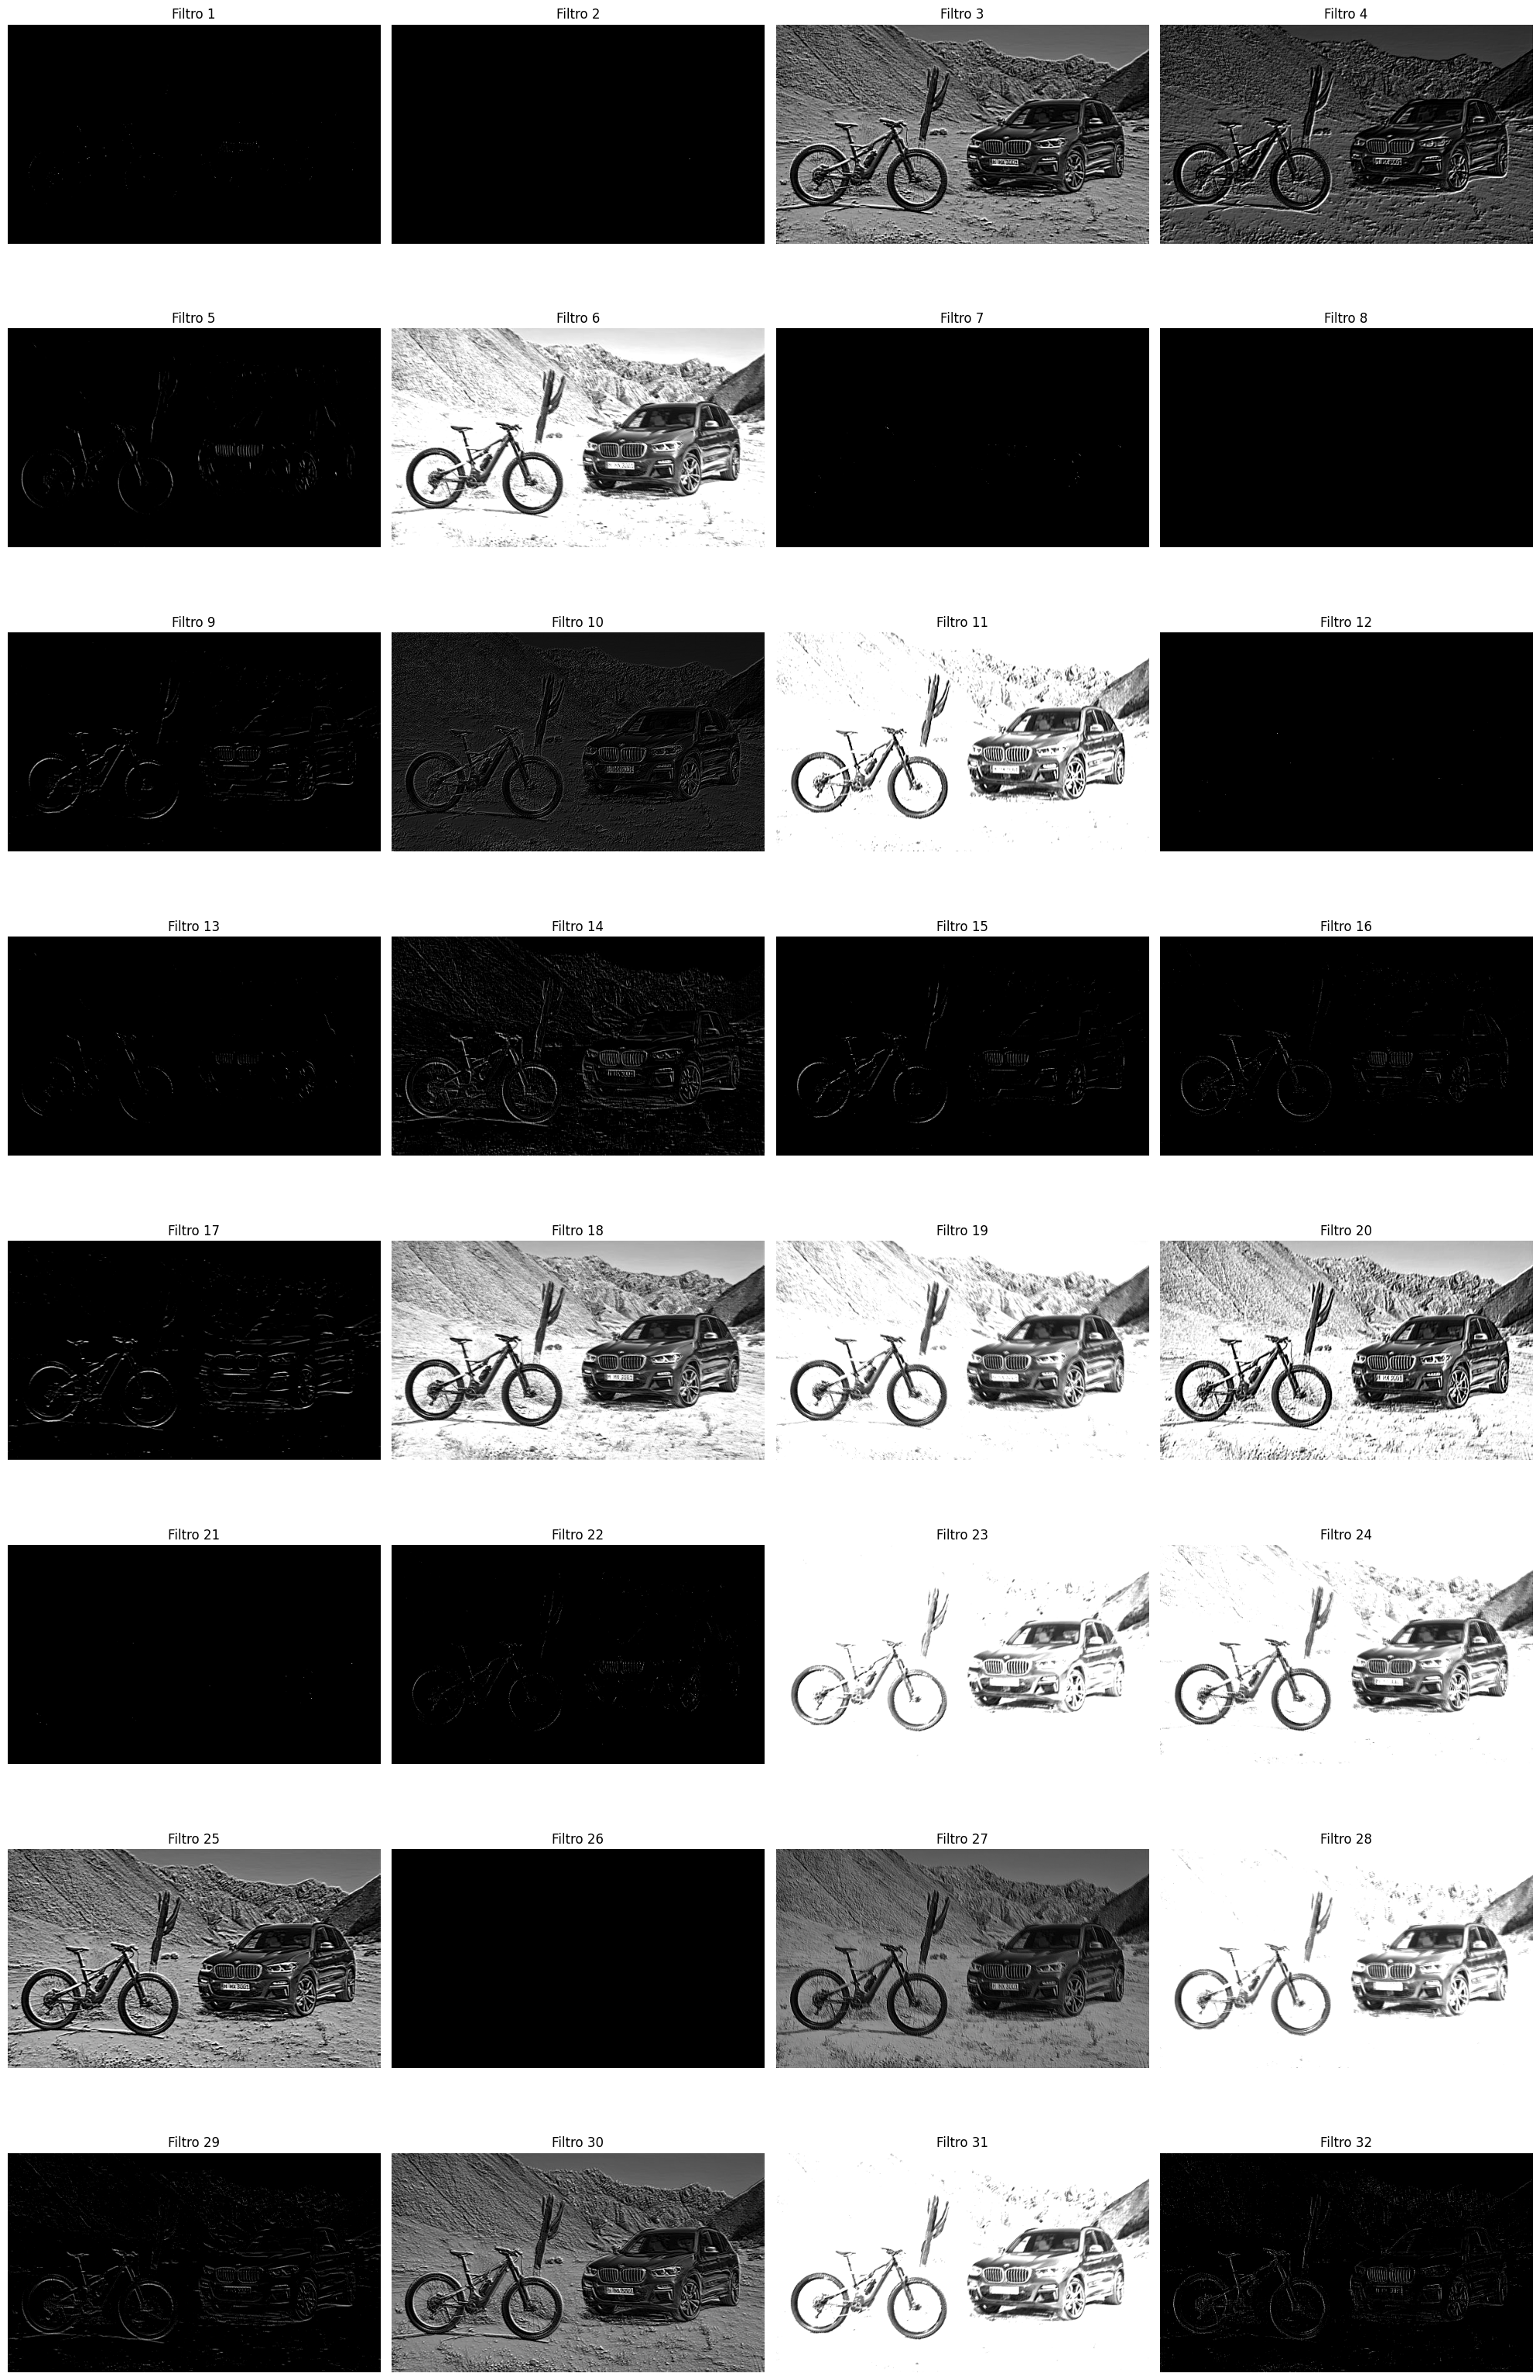

In [15]:
n_filters = 32
n_cols = 4
n_rows = (n_filters + n_cols - 1) // n_cols  # Redondeo hacia arriba

# Crear filtros aleatorios 3x3
np.random.seed(420)
random_filters = [np.random.uniform(-1, 1, (3, 3)) for _ in range(n_filters)]

# Aplicar filtros aleatorios
filtered_outputs = [cv2.filter2D(gray, -1, f) for f in random_filters]

plt.figure(figsize=(n_cols*5, n_rows*4))

# Filtros aleatorios
for i, output in enumerate(filtered_outputs):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.title(f"Filtro {i+1}")
    plt.imshow(output, cmap='gray')
    plt.axis("off")

plt.tight_layout()
plt.show()